<hr style="border-width:2px;border-color:#75DFC1">

# Study Case

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression, mutual_info_regression, RFE, RFECV
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

### DataFrame observation

In [13]:
#read csv file 
df_training = pd.read_csv('training.csv', sep = ',')
df_training.head()

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED
0,C100000,zero,660.000000,19995.0,0,0,897338.0,False,4,3,160.0,155,1,1.2,15,very_unsat,little,considering,STAY
1,C100001,one,317.647059,31477.0,155,15,393396.0,True,0,1,100.0,245,27,2.7,4,unsat,little,considering,LEAVE
2,C100006,zero,208.695652,66742.0,0,13,937197.0,False,4,2,127.0,493,20,2.6,4,avg,very_little,considering,STAY
3,C100008,zero,265.017668,40864.0,183,0,986430.0,False,3,3,86.0,390,13,2.5,12,unsat,very_high,considering,LEAVE
4,C100010,one,440.000000,43321.5,200,0,394622.0,True,2,3,77.0,175,18,2.4,10,very_unsat,little,actively_looking_into_it,LEAVE


In [14]:
df_training.info()
# df_training.describe()
# df_training.dtypes
# df_training.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11981 entries, 0 to 11980
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CUSTOMER_ID                  11981 non-null  object 
 1   COLLEGE                      11981 non-null  object 
 2   DATA                         11981 non-null  float64
 3   INCOME                       11981 non-null  float64
 4   OVERCHARGE                   11981 non-null  int64  
 5   LEFTOVER                     11981 non-null  int64  
 6   HOUSE                        11346 non-null  float64
 7   LESSTHAN600k                 11346 non-null  object 
 8   CHILD                        11981 non-null  int64  
 9   JOB_CLASS                    11981 non-null  int64  
 10  REVENUE                      11981 non-null  float64
 11  HANDSET_PRICE                11981 non-null  int64  
 12  OVER_15MINS_CALLS_PER_MONTH  11981 non-null  int64  
 13  TIME_CLIENT     

In [15]:
df_training.describe()

,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION
count,11981.000000,11981.000000,11981.000000,11981.000000,11346.000000,11981.000000,11981.000000,11981.000000,11981.000000,11981.000000,11981.000000,11981.000000
mean,503.625376,47595.943703,80.185460,23.785577,506521.681650,2.070194,2.508639,155.541941,383.495868,7.540356,3.079250,5.972957
std,457.156513,22293.736749,84.587419,26.680037,256808.319571,1.249974,1.120546,47.905580,210.601172,8.768863,1.650221,4.361189
min,0.000000,10032.500000,-2.000000,0.000000,150015.000000,0.000000,1.000000,50.000000,130.000000,0.000000,0.300000,1.000000
25%,181.818182,29367.000000,0.000000,0.000000,268511.250000,1.000000,2.000000,121.000000,217.000000,1.000000,1.900000,2.000000
50%,360.995851,44992.500000,56.000000,15.000000,469775.500000,2.000000,3.000000,149.000000,322.000000,4.000000,2.700000,5.000000
75%,685.714286,65078.000000,171.000000,41.000000,722464.250000,3.000000,4.000000,182.000000,515.000000,13.000000,3.800000,9.000000
max,6600.000000,105355.500000,298.000000,89.000000,999996.000000,7.000000,4.000000,521.000000,899.000000,29.000000,21.000000,15.000000


In [16]:
for i in df_training.columns:
    print(f'Unique {i} count : {df_training[i].nunique()}')
    print(f'{df_training[i].unique()}\n")')

Unique CUSTOMER_ID count : 11981
['C100000' 'C100001' 'C100006' ... 'C115970' 'C115972' 'C115973']
")
Unique COLLEGE count : 2
['zero' 'one']
")
Unique DATA count : 6700
[660.         317.64705882 208.69565217 ... 134.69387755 127.78315586
 723.52941176]
")
Unique INCOME count : 10629
[19995.  31477.  66742.  ... 77674.5 37730.5 34867.5]
")
Unique OVERCHARGE count : 263
[  0 155 183 200 168 179 204  42  47 209  62  34  65  54 160 201  88 219
 173  71 245  63  83  56 171  51  66 223 191  61  32 187 161 181  90 226
 218 221  86  27  85  46  59 186 197 167 207 210  72  52  64 177  44 217
 166 236 220  69  77  81  70 169 182  39  57 248  84  50 230 232  58  76
  67 144 202 224 163  79 206  45 153 141  38 162  33 213  31 244  74 198
  36 205 184 194 101 164  68  55  41 178 227 222 214 176  28 241 190 271
  87 216  92 188  60 235 165 154 159 253  78  40 212 175 139  48 196 208
  53 269 172  26 284 189  37 228  73 174  43  96  49  75 266 199 215 185
 251 143 193 211 260  80  89 233  24 195 14

### Easy features to delete

Features deleted by intuition for the model :
 
 * ***CUSTOMER_ID*** :  nothing relevant to the analysis

 * ***LESSTHAN600k*** : It's a feature that depends directly on HOUSE feature. (Good news! It's a feature with NaN) 

In [17]:
remCol = []
for col in df_training.columns:
    if (col=="CUSTOMER_ID")   |  (col=="LESSTHAN600k" ):
        print("column "+ col+" deleted")
    else:
        remCol.append(col)
        
df_training = df_training[remCol]

column CUSTOMER_ID deleted
column LESSTHAN600k deleted


### Outliners

para los valores númericos (float64) vamos a ver si hay algún outliers

In [18]:
df_training.dtypes

COLLEGE                         object
DATA                           float64
INCOME                         float64
OVERCHARGE                       int64
LEFTOVER                         int64
HOUSE                          float64
CHILD                            int64
JOB_CLASS                        int64
REVENUE                        float64
HANDSET_PRICE                    int64
OVER_15MINS_CALLS_PER_MONTH      int64
TIME_CLIENT                    float64
AVERAGE_CALL_DURATION            int64
REPORTED_SATISFACTION           object
REPORTED_USAGE_LEVEL            object
CONSIDERING_CHANGE_OF_PLAN      object
CHURNED                         object
dtype: object

<AxesSubplot:xlabel='DATA'>

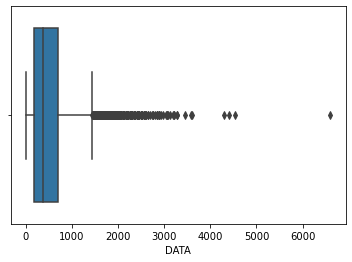

In [19]:
sns.boxplot(df_training['DATA'])

In [20]:
df_training.shape

(11981, 17)

<AxesSubplot:xlabel='TIME_CLIENT'>

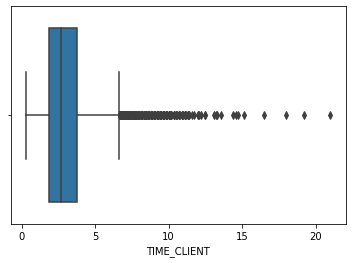

In [21]:
sns.boxplot(df_training['TIME_CLIENT'])

In [22]:
df_training = df_training[df_training['DATA'] <= 2500]
df_training = df_training[df_training['TIME_CLIENT'] <= 9.5]

<AxesSubplot:xlabel='TIME_CLIENT'>

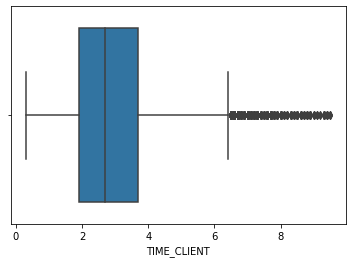

In [23]:
sns.boxplot(df_training['TIME_CLIENT'])

In [24]:
Q1 = np.percentile(df_training['DATA'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_training['DATA'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1


# Above Upper bound
upper = df_training['DATA'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper.any())
#print(np.where(upper))
 
# Below Lower bound
lower = df_training['DATA'] <= (Q1-1.5*IQR)
print("Lower bound:", lower.any())
#print(np.where(lower))

Upper bound: True
Lower bound: False


In [25]:
len(list(upper[upper == True]))

530

In [26]:
# # Z score
# from scipy import stats
# import numpy as np
 
# z = np.abs(stats.zscore(df_training['DATA']))
# threshold = 3
 
# # Position of the outlier
# print(np.where(z > 3))

### Null values

In [27]:
df_training.isna().sum()

COLLEGE                          0
DATA                             0
INCOME                           0
OVERCHARGE                       0
LEFTOVER                         0
HOUSE                          627
CHILD                            0
JOB_CLASS                        0
REVENUE                          0
HANDSET_PRICE                    0
OVER_15MINS_CALLS_PER_MONTH      0
TIME_CLIENT                      0
AVERAGE_CALL_DURATION            0
REPORTED_SATISFACTION            0
REPORTED_USAGE_LEVEL             0
CONSIDERING_CHANGE_OF_PLAN       0
CHURNED                          0
dtype: int64

In [28]:
#pd.isnull(df_training['HOUSE']).values.ravel().sum()
#pd.notnull(df_training['HOUSE']).values.ravel().sum()

# Warning!! We have NaN in some columns, we are going to delete these rows
# and see if these columns are important or not
df_training = df_training[df_training['HOUSE'].notna()]
#df_training = df_training[df_training['LESSTHAN600k'].notna()]
df_training.reset_index(inplace=True, drop=True)

In [29]:
df_training.shape

(11250, 17)

### Añadir un poco de observación mediante gráficas

Sobre todo lo que me raya es si hay valores aberrantes que hacer ?
Quizas está parte es mejor ponerla al final 

In [30]:
#Defining bar chart function
def bar(feature, df=df_training ):
    #Groupby the categorical feature
    temp_df = df.groupby([feature, 'CHURNED']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    #Calculate the value counts of each distribution and it's corresponding Percentages
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    #Calculate the value counts of each distribution and it's corresponding Percentages
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    #Defining string formatting for graph annotation
    #Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, ' #append to empty string(formatted_str)
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    #Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str


    #Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)
    
    #Setting graph framework
    fig = px.bar(temp_df, x=feature, y='Count', color='CHURNED', title=f'Churn rate by {feature}', barmode="group", color_discrete_sequence=[ "red", "green"])
    fig.add_annotation(
                text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.4,
                y=1.3,
                bordercolor='black',
                borderwidth=1)
    fig.update_layout(
        # margin space for the annotations on the right
        margin=dict(r=400),
    )
     
    return fig.show()

In [31]:
df_training.dtypes

COLLEGE                         object
DATA                           float64
INCOME                         float64
OVERCHARGE                       int64
LEFTOVER                         int64
HOUSE                          float64
CHILD                            int64
JOB_CLASS                        int64
REVENUE                        float64
HANDSET_PRICE                    int64
OVER_15MINS_CALLS_PER_MONTH      int64
TIME_CLIENT                    float64
AVERAGE_CALL_DURATION            int64
REPORTED_SATISFACTION           object
REPORTED_USAGE_LEVEL            object
CONSIDERING_CHANGE_OF_PLAN      object
CHURNED                         object
dtype: object

On va voir las variables objects

In [32]:
bar('') #LESSTHAN600k #REPORTED_SATISFACTION #CONSIDERING_CHANGE_OF_PLAN #REPORTED_USAGE_LEVEL

ValueError: cannot insert CHURNED, already exists

In [9]:
def hist(feature):
    group_df = df_training.groupby([feature, 'CHURNED']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df, x=feature, y='Count', color='CHURNED', marginal='box', title=f'Churn rate frequency to {feature} distribution', color_discrete_sequence=["green", "red"])
    fig.show()

In [11]:
hist('HOUSE')

<AxesSubplot:>

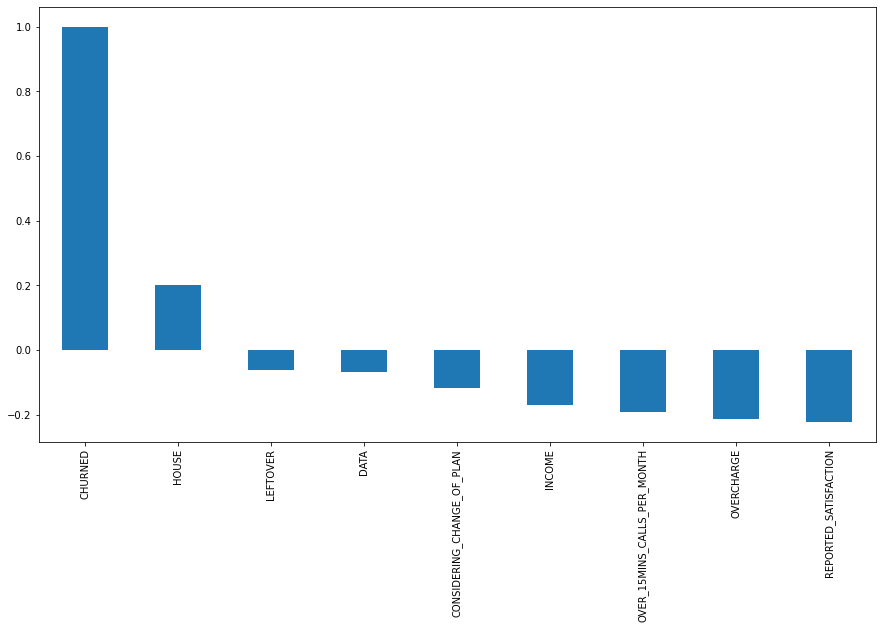

In [150]:
plt.figure(figsize=(15,8))
df_training.corr()['CHURNED'].sort_values(ascending = False).plot(kind='bar')

### Data Cleaning 

In [116]:
df_training['COLLEGE'] = df_training['COLLEGE'].map({'zero' : float(0), 'one': float(1)})
df_training['CHURNED'] = df_training['CHURNED'].map({'LEAVE' : float(0), 'STAY': float(1)})
df_training['DATA'] = df_training['DATA'].round(2)
columns_to_float = ['OVERCHARGE', 'LEFTOVER', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION']
df_training[columns_to_float] = df_training[columns_to_float].astype(float)
# df_training['LESSTHAN600k'] = df_training['LESSTHAN600k'].astype(float)
df_training['CHILD'] = df_training['CHILD'].astype(float)
#df_training['JOB_CLASS'] = df_training['JOB_CLASS'].astype(float)
df_training['DATA'] = df_training['DATA'].round(2)

#df_training['REPORTED_SATISFACTION'].unique()


In [117]:
# list(df_training['REPORTED_SATISFACTION'].unique()) 
# list(df_training['REPORTED_USAGE_LEVEL'].unique()) 
# list(df_training['CONSIDERING_CHANGE_OF_PLAN'].unique()) 

df_training['CONSIDERING_CHANGE_OF_PLAN'] = df_training['CONSIDERING_CHANGE_OF_PLAN'].map({
                                                    'actively_looking_into_it' : float(1),
                                                    'considering': float(.75),
                                                    'perhaps': float(.5),
                                                    'no': float(.25),
                                                    'never_thought': float(0),
                                                    })

df_training['REPORTED_USAGE_LEVEL'] = df_training['REPORTED_USAGE_LEVEL'].map({
                                                    'very_little' : float(1),
                                                    'little': float(.75),
                                                    'avg': float(.5),
                                                    'high' : float(.25),
                                                    'very_high': float(0),
                                                    })

df_training['REPORTED_SATISFACTION'] = df_training['REPORTED_SATISFACTION'].map({
                                                    'very_unsat' : float(1),
                                                    'unsat': float(.75),
                                                    'avg': float(.5),
                                                    'sat' : float(.25),
                                                    'very_sat': float(0),
                                                    })

In [118]:
#Dummies 
def createDummies(df, col, var_name):
    dummy = pd.get_dummies(df[col], prefix=var_name)
    df = df.drop(col, axis = 1)
    df = pd.concat([df, dummy ], axis = 1)
    return df

df_training = createDummies(df_training, 'JOB_CLASS', var_name='JOB_CLASS')
df_training['JOB_CLASS_1'] = df_training['JOB_CLASS_1'].astype(float)
df_training['JOB_CLASS_2'] = df_training['JOB_CLASS_2'].astype(float)
df_training['JOB_CLASS_3'] = df_training['JOB_CLASS_3'].astype(float)
df_training['JOB_CLASS_4'] = df_training['JOB_CLASS_4'].astype(float)
# df_training = createDummies(df_training, 'CONSIDERING_CHANGE_OF_PLAN', var_name='Change_Plan')
# df_training = createDummies(df_training, 'REPORTED_USAGE_LEVEL', var_name='Report_Usage')

In [119]:
df_training.head()

,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,CHILD,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED,JOB_CLASS_1,JOB_CLASS_2,JOB_CLASS_3,JOB_CLASS_4
0,0.0,660.00,19995.0,0.0,0.0,897338.0,4.0,160.0,155.0,1.0,1.2,15.0,1.00,0.75,0.75,1.0,0.0,0.0,1.0,0.0
1,1.0,317.65,31477.0,155.0,15.0,393396.0,0.0,100.0,245.0,27.0,2.7,4.0,0.75,0.75,0.75,0.0,1.0,0.0,0.0,0.0
2,0.0,208.70,66742.0,0.0,13.0,937197.0,4.0,127.0,493.0,20.0,2.6,4.0,0.50,1.00,0.75,1.0,0.0,1.0,0.0,0.0
3,0.0,265.02,40864.0,183.0,0.0,986430.0,3.0,86.0,390.0,13.0,2.5,12.0,0.75,0.00,0.75,0.0,0.0,0.0,1.0,0.0
4,1.0,440.00,43321.5,200.0,0.0,394622.0,2.0,77.0,175.0,18.0,2.4,10.0,1.00,0.75,1.00,0.0,0.0,0.0,1.0,0.0


### Varianza nula

Ver si alguna feature tiene la desviación típica muy baja, eso significa que no se mueve nada y no sirve de nada para el análisis

In [120]:
feature = 'OVER_15MINS_CALLS_PER_MONTH'
df_training[feature][df_training[feature] != df_training[feature].max()].describe()

count    11069.000000
mean         7.189629
std          8.382842
min          0.000000
25%          1.000000
50%          4.000000
75%         12.000000
max         28.000000
Name: OVER_15MINS_CALLS_PER_MONTH, dtype: float64

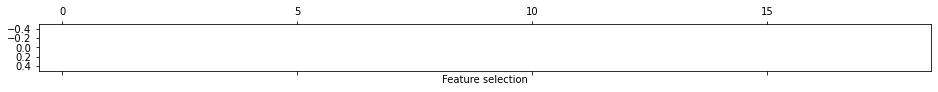

In [121]:
data = df_training.drop('CHURNED', axis = 1)
target = df_training['CHURNED']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)


sel = VarianceThreshold(threshold = 1e-06)
sel.fit(X_train)


mask = sel.get_support()

#Décommentez les lignes ci dessous avant d'exécuter votre code
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Feature selection');

c'est bon, on trouve pas ! está bien que me haya fijado en la desviación típica

### Select main features


 
 
 Intuición pero hay que demostrar
 * ***JOB_CLASS*** : I think the job_class is not very important. it's more important the income. Demonstrate both features are correlated.!!
 
 * ***COLLEGE*** :  I think it's not important, this feature you can know thanks to clients' revenue

 

In [122]:
remCol = []
for col in df_training.columns:
    if (col=="JOB_CLASS_4" ):
        print("column "+ col+" deleted")
    else:
        remCol.append(col)
        
df_training = df_training[remCol]

column JOB_CLASS_4 deleted


In [123]:
#mirar bien lo que es una correlación

corr = df_training.corr()

fig = px.imshow(corr, width=800, height=800)
fig.show()

 - Vemos claramente que los job  y college hay que quitarlos estan muy pocos correlados vamos a quitarlos y verlo otra vez
  - Y también pasa lo mismo con Report Usage Level, vemos que no tiene relación con ninguna variable y mismamente con CHURN 

In [124]:
remCol = []
for col in df_training.columns:
    if (col=="CUSTOMER_ID") | (col=="JOB_CLASS_1")  |  (col=="JOB_CLASS_2" ) | (col=="JOB_CLASS_3" ) | (col=="COLLEGE" ) | (col=="REPORTED_USAGE_LEVEL" ):
        print("column "+ col+" deleted")
    else:
        remCol.append(col)
        
df_training = df_training[remCol]

column COLLEGE deleted
column REPORTED_USAGE_LEVEL deleted
column JOB_CLASS_1 deleted
column JOB_CLASS_2 deleted
column JOB_CLASS_3 deleted


### normalización

In [127]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_training)
df_training = pd.DataFrame(normalized_data, columns=remCol)

In [128]:
df_training_2 = df_training.copy()

In [ ]:
# scaler = StandardScaler()
# target = df_training['CHURNED']
# normalized_data = scaler.fit_transform(df_training.drop('CHURNED', axis = 1))
# df_normalized_2 = pd.DataFrame(normalized_data, columns=remCol_2)
# df_normalized_2 = pd.concat([df_normalized_2, target], axis =1)
# df_normalized_2.head()

### Statsmodels

In [129]:
data_df = df_training.copy()
all_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_") for column in data_df.columns]
data_df.columns = all_columns
glm_columns = [e for e in all_columns if e not in ['CHURNED']]
glm_columns = ' + '.join(map(str, glm_columns))

glm_model = smf.glm(formula=f'CHURNED ~ {glm_columns}', data=data_df, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                CHURNED   No. Observations:                11250
Model:                            GLM   Df Residuals:                    11236
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6131.1
Date:                Mon, 17 Oct 2022   Deviance:                       12262.
Time:                        17:32:11   Pearson chi2:                 1.13e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2001
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

quitamos revenue et average_call por el Pz mayor que 0.05

In [130]:
remCol = []
for col in df_training.columns:
    if (col=="REVENUE") | (col=="AVERAGE_CALL_DURATION") :
        print("column "+ col+" deleted")
    else:
        remCol.append(col)
        
df_training = df_training[remCol]

column REVENUE deleted
column AVERAGE_CALL_DURATION deleted


In [131]:
corr = df_training.corr()

fig = px.imshow(corr, width=800, height=800)
fig.show()

 - vemos que Child respecto a nuestra variable child esta muy poco relacionada con CHURNED, la quitamos 
 - De la misma manera handset price esta solamente relacionada con el income por lo que nos quedamos con el INCOME (lógicamente)  
 
 - Es más arriesgado pero Time_Client sólo depend de DATA 
 
 



In [132]:
remCol = []
for col in df_training.columns:
    if (col=="CHILD") | (col=="HANDSET_PRICE")| (col=="TIME_CLIENT") :
        print("column "+ col+" deleted")
    else:
        remCol.append(col)
        
df_training = df_training[remCol]

column CHILD deleted
column HANDSET_PRICE deleted
column TIME_CLIENT deleted


In [133]:
corr = df_training.corr()

fig = px.imshow(corr, width=800, height=800)
fig.show()

In [134]:
data_df = df_training.copy()
all_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_") for column in data_df.columns]
data_df.columns = all_columns
glm_columns = [e for e in all_columns if e not in ['CHURNED']]
glm_columns = ' + '.join(map(str, glm_columns))

glm_model = smf.glm(formula=f'CHURNED ~ {glm_columns}', data=data_df, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                CHURNED   No. Observations:                11250
Model:                            GLM   Df Residuals:                    11241
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6283.3
Date:                Mon, 17 Oct 2022   Deviance:                       12567.
Time:                        17:34:56   Pearson chi2:                 1.12e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1782
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

según esto creo que también habría que suprimir INCOME et HOUSE por su poco coeficiente con respecto a los demás

In [75]:
#sns.pairplot(df_training, diag_kind = 'kde')

In [76]:
remCol = []
for col in df_training.columns:
    if (col=="INCOME") | (col=="HOUSE") :
        print("column "+ col+" deleted")
    else:
        remCol.append(col)
        
df_training = df_training[remCol]

column INCOME deleted
column HOUSE deleted


In [77]:
data_df = df_training.copy()
all_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_") for column in data_df.columns]
data_df.columns = all_columns
glm_columns = [e for e in all_columns if e not in ['CHURNED']]
glm_columns = ' + '.join(map(str, glm_columns))

glm_model = smf.glm(formula=f'CHURNED ~ {glm_columns}', data=data_df, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                CHURNED   No. Observations:                11250
Model:                            GLM   Df Residuals:                    11243
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6582.0
Date:                Mon, 17 Oct 2022   Deviance:                       13164.
Time:                        16:51:27   Pearson chi2:                 1.12e+04
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1333
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [78]:
corr = df_training.corr()

fig = px.imshow(corr, width=800, height=800)
fig.show()

HABRÍA AHORA QUE VER QUE LOS DATOS QUE HEMOS SUPRIMIDO POR OUTLIERS OU POR NULLS son features
qui sont importantes


### Wrapper methods

In [135]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression, mutual_info_regression, RFE, RFECV

In [136]:
lm = LinearRegression()

data = df_training_2.drop('CHURNED', axis = 1)
target = df_training_2['CHURNED']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

In [137]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_training)
df_normalized = pd.DataFrame(normalized_data, columns=remCol)

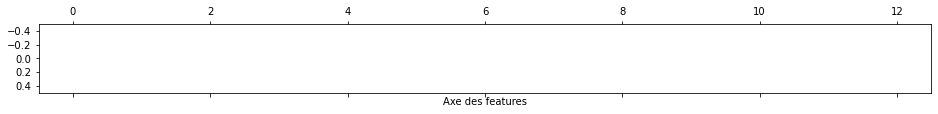

In [142]:
crossval = KFold(n_splits = 5, random_state = 2, shuffle = True)

rfecv = RFECV(estimator = lm, cv = crossval, step = 1)
rfecv.fit(X_train, y_train)

mask = rfecv.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Axe des features');
plt.show();


In [139]:
rfecv.grid_scores_

array([[ 2.25918195e-03, -3.13611044e-05,  4.02523207e-02,
         2.83013779e-03,  3.65111843e-03],
       [ 5.27241898e-02,  6.13036023e-02,  7.02758578e-02,
         7.68559385e-02,  7.47062408e-02],
       [ 7.67526541e-02,  7.02754104e-02,  7.82565870e-02,
         8.68487478e-02,  8.60647176e-02],
       [ 1.16077157e-01,  1.23505637e-01,  1.02028406e-01,
         1.32869227e-01,  1.22088623e-01],
       [ 1.56597317e-01,  1.30819699e-01,  1.41889107e-01,
         1.76620810e-01,  1.53253438e-01],
       [ 1.76953400e-01,  1.66456062e-01,  1.63804341e-01,
         1.96048740e-01,  1.71100466e-01],
       [ 1.84305840e-01,  1.66884222e-01,  1.71253995e-01,
         2.01245493e-01,  1.75245841e-01],
       [ 1.91311017e-01,  1.76520297e-01,  1.81152804e-01,
         2.07138158e-01,  1.85475295e-01],
       [ 2.03044209e-01,  1.80069440e-01,  1.88161649e-01,
         2.11100437e-01,  1.95946008e-01],
       [ 2.05452431e-01,  1.81293470e-01,  1.88971595e-01,
         2.12847666e-01

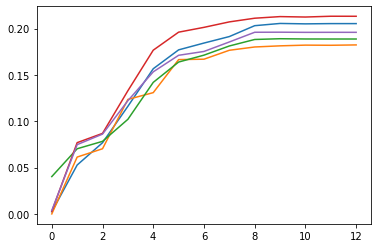

13


In [140]:
rfecv.grid_scores_
plt.plot(range(len(rfecv.grid_scores_)), rfecv.grid_scores_)
plt.show()

print(rfecv.n_features_)


### Best features Sk-learn 

In [146]:
from sklearn.model_selection import train_test_split
X = df_training_2.drop('CHURNED', axis=1)
y = df_training_2['CHURNED']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)  


In [147]:
# Feature selection to improve model building
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
log = LogisticRegression()
rfecv = RFECV(estimator=log, cv=StratifiedKFold(10, random_state=50, shuffle=True), scoring='roc_auc')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
      estimator=LogisticRegression(), scoring='roc_auc')

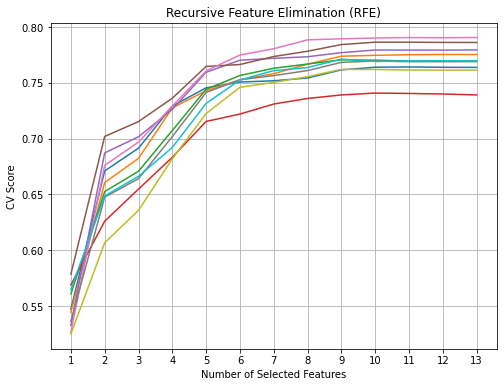

The optimal number of features: 10


In [148]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, X.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

después de quitar las features más claras vamos a trabajar con otros métodos con el dataframe_2

# Start again

In [151]:
#read csv file 
df_training = pd.read_csv('training.csv', sep = ',')
df_training.head()

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED
0,C100000,zero,660.000000,19995.0,0,0,897338.0,False,4,3,160.0,155,1,1.2,15,very_unsat,little,considering,STAY
1,C100001,one,317.647059,31477.0,155,15,393396.0,True,0,1,100.0,245,27,2.7,4,unsat,little,considering,LEAVE
2,C100006,zero,208.695652,66742.0,0,13,937197.0,False,4,2,127.0,493,20,2.6,4,avg,very_little,considering,STAY
3,C100008,zero,265.017668,40864.0,183,0,986430.0,False,3,3,86.0,390,13,2.5,12,unsat,very_high,considering,LEAVE
4,C100010,one,440.000000,43321.5,200,0,394622.0,True,2,3,77.0,175,18,2.4,10,very_unsat,little,actively_looking_into_it,LEAVE
